# Table of Contents
 <p><div class="lev1"><a href="#matplotlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>matplotlib</a></div><div class="lev2"><a href="#pyplotを用いた可視化-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>pyplotを用いた可視化</a></div><div class="lev2"><a href="#描画対象のFigureの明示-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>描画対象のFigureの明示</a></div><div class="lev2"><a href="#複数の図のプロット-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>複数の図のプロット</a></div><div class="lev2"><a href="#アニメーションの作成-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>アニメーションの作成</a></div><div class="lev1"><a href="#はじめての回帰分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>はじめての回帰分析</a></div><div class="lev1"><a href="#SymPy入門-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SymPy入門</a></div><div class="lev2"><a href="#応用-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>応用</a></div>

In [2]:
import pandas as pd

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.4.5.final.0
python-bits: 64
OS: Darwin
OS-release: 15.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: ja_JP.UTF-8
LANG: ja_JP.UTF-8

pandas: 0.18.1
nose: 1.3.7
pip: 8.1.2
setuptools: 26.1.1
Cython: 0.24.1
numpy: 1.11.1
scipy: 0.17.1
statsmodels: 0.6.1
xarray: None
IPython: 5.1.0
sphinx: 1.4.1
patsy: 0.4.1
dateutil: 2.5.3
pytz: 2016.6.1
blosc: None
bottleneck: 1.1.0
tables: 3.2.3.1
numexpr: 2.6.1
matplotlib: 1.5.1
openpyxl: 2.3.2
xlrd: 1.0.0
xlwt: 1.1.2
xlsxwriter: 0.9.2
lxml: 3.6.0
bs4: 4.3.2
html5lib: None
httplib2: None
apiclient: None
sqlalchemy: 1.0.13
pymysql: None
psycopg2: None
jinja2: 2.8
boto: 2.40.0
pandas_datareader: None


In [3]:
print ("こんにちは")

こんにちは


In [4]:
import sklearn

In [5]:
sklearn.__version__

'0.17.1'

$$x = 3$$

Suppose $x=3$, then...

# matplotlib

## pyplotを用いた可視化

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

In [3]:
import numpy as np

In [4]:
np.random.seed(123)

In [5]:
N = 100
x = np.random.rand(N)
y = 2 * x + np.random.randn(N)

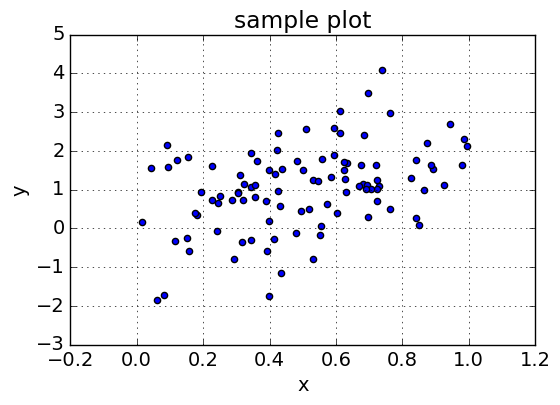

In [8]:
plt.scatter(x,y)
plt.title('sample plot') # the title of the figure
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # draw grid lines
plt.show()

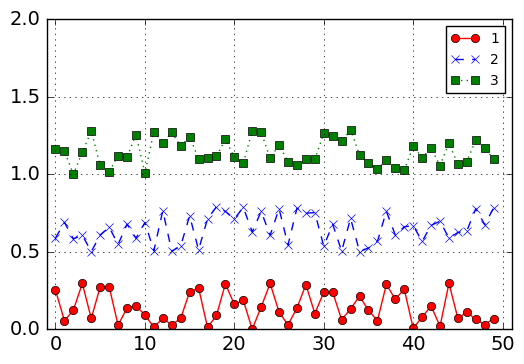

In [10]:
N = 50
plt.plot(0 + 0.3 * np.random.rand(N), c='r', marker='o', linestyle='-', label='1')
plt.plot(0.5 + 0.3 * np.random.rand(N), c='b', marker='x', linestyle='--', label='2')
plt.plot(1 + 0.3 * np.random.rand(N), c='g', marker='s', linestyle=':', label='3')
plt.xlim(-1, 51)
plt.ylim(0, 2.0)
plt.legend(loc='upper right', prop={'size':10})
plt.grid()
plt.show()

## 描画対象のFigureの明示

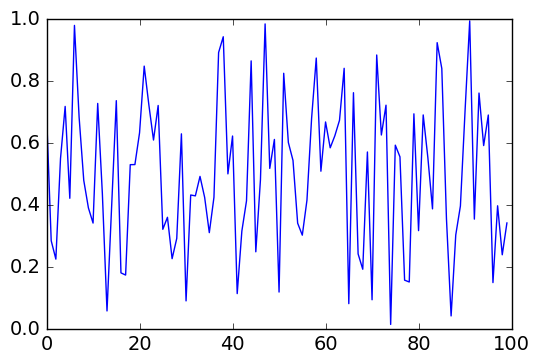

In [13]:
np.random.seed(123)
fig = plt.figure()
ax = fig.gca()
ax.plot(np.random.rand(100))
plt.show()

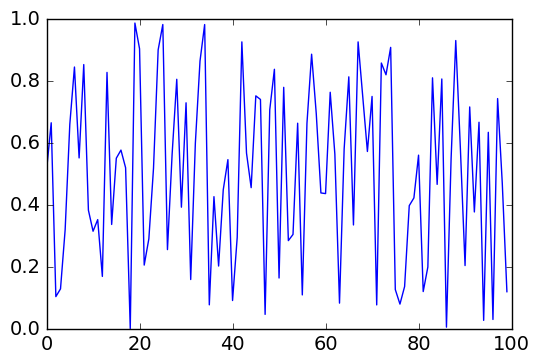

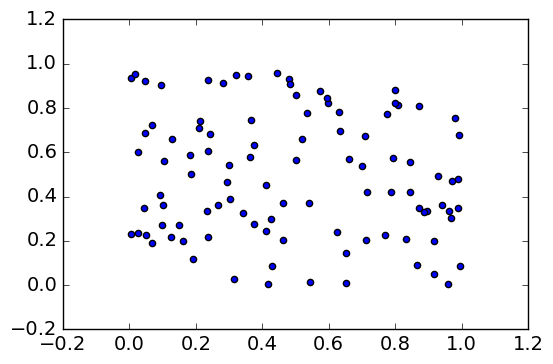

In [12]:
fig1, fig2 = plt.figure(1), plt.figure(2)
plt.figure(1) #figure1を選択
plt.plot(np.random.rand(100))
plt.figure(2)
plt.scatter(np.random.rand(100), np.random.rand(100))
plt.show()

## 複数の図のプロット

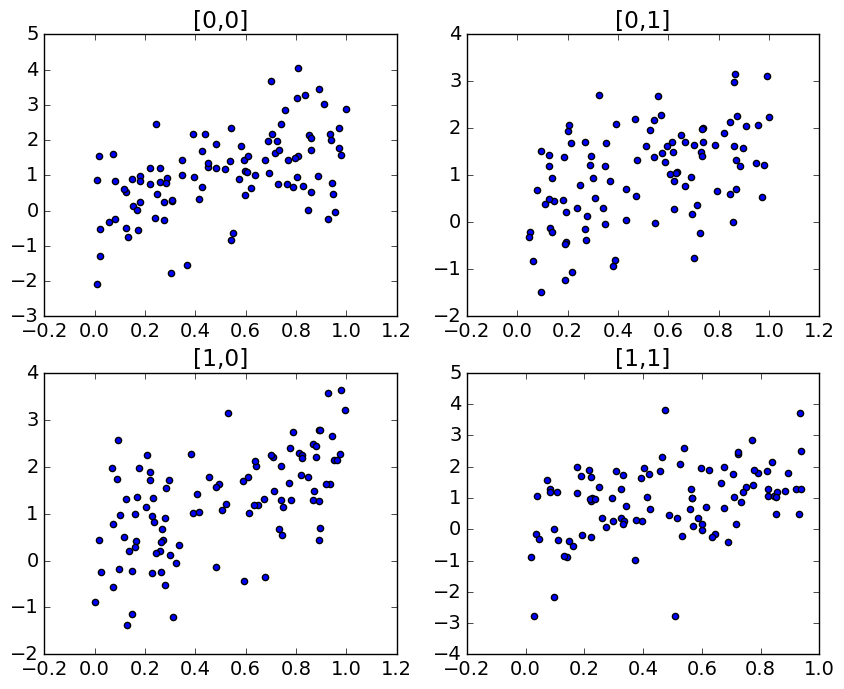

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8)) #図を2行2列に分割
N = 100
np.random.rand(123)
nrow, ncol = ax.shape #この場合両方に2を代入
for i in range(nrow):
    for j in range(ncol):
        x = np.random.rand(N)
        y = 2*x + np.random.randn(N)
        ax[i,j].scatter(x, y)
        ax[i,j].set_title('[' + str(i) + ',' + str(j) + ']')
plt.show()

## アニメーションの作成

In [2]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 1000
np.random.seed(123)
x = np.random.randn(N)

absmax_x = np.ceil(np.max(np.abs(x)))
xmin, xmax = -absmax_x, absmax_x

#描画関数
def animate(nframe):
    plt.cla() # Axesオブジェクトのクリア
    plt.hist(x[:nframe], bins=20)
    plt.xlim(xmin, xmax)
    plt.ylim(0, 100)
    plt.title('N=%s' % nframe)

fig = plt.figure()

#アニメーションのインスタンス化
anim = animation.FuncAnimation(fig, animate, np.arange(1, N+1))

#gifファイルに保存
anim.save('hist.gif', writer='imagemagick', fps=20)

#アニメーションの表示
plt.show()

<IPython.core.display.Javascript object>

BrokenPipeError: [Errno 32] Broken pipe

# はじめての回帰分析

http://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0/
ここを参考に。

In [3]:
import pandas as pd
import numpy as np

wine = pd.read_csv("winequality-red.csv", sep=';')
wine.head

<bound method DataFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

In [5]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

X = wine.loc[:, ['density']].as_matrix()
Y = wine['alcohol'].as_matrix()

clf.fit(X, Y)

print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, Y))

[-280.16382307]
289.675343383
0.246194364397


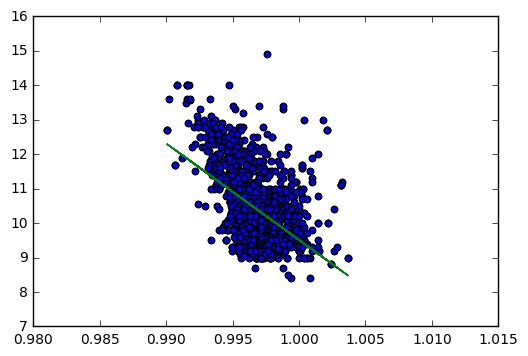

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, clf.predict(X))
plt.show()

# SymPy入門

http://taromaru-kun.hatenablog.com/entry/2015/03/14/214822
http://myenigma.hatenablog.com/entry/2015/11/21/222755
http://www.turbare.net/transl/scipy-lecture-notes/packages/sympy.html

In [15]:
#数式を綺麗に表示
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [1]:
from sympy import *

In [10]:
#symbolの宣言
x,y = symbols("x y")

In [16]:
x + y

In [17]:
x + y - x

In [18]:
#式の展開
expr = (x+y)**5
expand(expr)

In [19]:
f = 2*x**2 - 3*x + 1

In [20]:
f

In [21]:
#因数分解
f.factor()

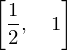

In [22]:
#方程式の解を求める
solve(Eq(f, 0), x)

In [24]:
f.subs([(x, 0)])

In [26]:
g = x + y + x**2 + x*y 

In [27]:
g

In [29]:
#代入は、tupleのlistを渡せばよい
g.subs([(x,0),(y,0)])

In [32]:
#微分
grad = diff(f, x)
grad

In [33]:
#積分
integrate(f, (x,0,1))

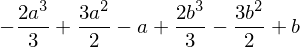

In [35]:
a, b = symbols("a b")
integrate(f, (x,a,b))

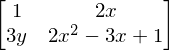

In [38]:
#行列
m = Matrix([[1, 2*x],
          [3*y, f]])
m

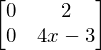

In [39]:
m.diff(x)

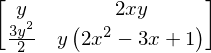

In [40]:
m.integrate(y)

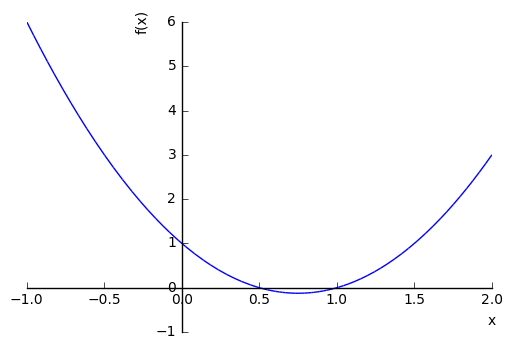

In [41]:
#関数のグラフのプロット
from sympy.plotting import plot
#xが[-1, 2]の範囲を図示
plot(f, (x, -1, 2))

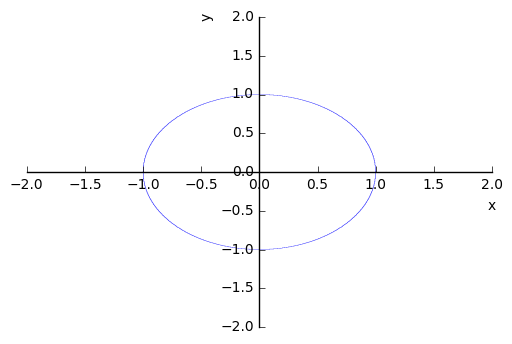

In [44]:
h = x**2 + y **2 - 1
plot_implicit(h, (x, -2, 2), (y, -2, 2))

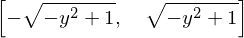

In [45]:
#方程式をある変数で解く
solve(h, x)

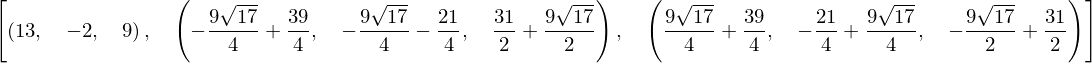

In [46]:
#連立方程式を解く
x, y, z = symbols('x y z')
eq1=x * y * z + 234
eq2=x + y + z - 20
eq3=5 * x - y + 2 * z - 85
solve([eq1,eq2,eq3], [x,y,z])

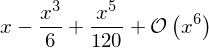

In [47]:
#テイラー展開
sin(x).series(x)

In [50]:
#極限
limit (sin(x)/x, x, 0)

In [51]:
limit (1/x, x, oo)

## 応用

In [52]:
u  = Symbol('u')

In [54]:
u = log(x + 1)
u

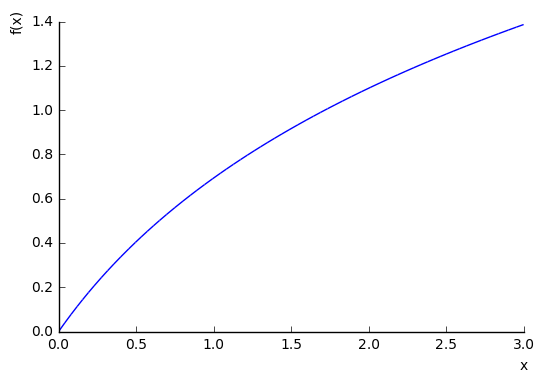

In [61]:
plot(u, (x, 0, 3))

In [70]:
u.diff(x).subs([(x,2)])

In [71]:
#x=2での接線を描きたい
l = u.diff(x).subs([(x,2)]) * ( x - 2 ) + u.subs([(x,2)])

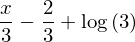

In [72]:
l

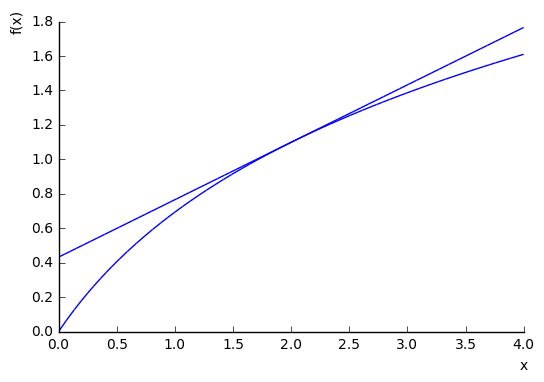

In [73]:
plot(l, u, (x, 0, 4))